In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from sqlalchemy import create_engine
import seaborn as sns



In [3]:
# Get Suicide data  
Suicide_data = pd.DataFrame(pd.read_csv("resources/master.csv.zip")) 
Suicide_data.head(-5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent


In [5]:
# Add data series to hold year 2015

suicide_2015 = Suicide_data.query("year == 2015")  
suicide_2015.head(-5)
suicide_2015 = suicide_2015.rename(columns={"country": "Country"})
suicide_2015.head()
suicides_num_country = suicide_2015.groupby(["Country"])["suicides_no"].sum()
suicides_num_country

Country
Antigua and Barbuda        1
Argentina               3073
Armenia                   74
Australia               3027
Austria                 1251
                       ...  
Turkmenistan             133
Ukraine                 7574
United Kingdom          4910
United States          44189
Uruguay                  630
Name: suicides_no, Length: 62, dtype: int64

In [6]:
suicides_num_country_population = suicide_2015.groupby(["Country"])["population"].sum()
suicides_num_country_population

Country
Antigua and Barbuda        91889
Argentina               39699624
Armenia                  2795335
Australia               22240785
Austria                  8219386
                         ...    
Turkmenistan             4886514
Ukraine                 40345446
United Kingdom          61082942
United States          300078511
Uruguay                  3190795
Name: population, Length: 62, dtype: int64

In [7]:
suicides_agg=pd.merge(suicides_num_country_population,suicides_num_country, on='Country')
suicides_agg.head()

,population,suicides_no
Country,,
Antigua and Barbuda,91889,1
Argentina,39699624,3073
Armenia,2795335,74
Australia,22240785,3027
Austria,8219386,1251


In [11]:
#calculate suicide rate per 100 thousand people
suicides_agg['avg_suicides']=(suicides_agg['suicides_no']/suicides_agg['population'])*100000
suicides_agg.head()

,population,suicides_no,avg_suicides
Country,,,
Antigua and Barbuda,91889,1,1.088270
Argentina,39699624,3073,7.740627
Armenia,2795335,74,2.647268
Australia,22240785,3027,13.610131
Austria,8219386,1251,15.220115


In [14]:
# Get happiness data 2015 
happiness_data_2015 = pd.DataFrame(pd.read_csv("resources/2015.csv")) 
happiness_data_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [36]:
happy_suicide_2015 = pd.merge(suicides_agg, happiness_data_2015, on = 'Country')
happy_suicide_2015.dropna(axis=1, how='any', inplace=True)
happy_suicide_2015.head(5)

,Country,population,suicides_no,avg_suicides,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Argentina,39699624,3073,7.740627,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
1,Armenia,2795335,74,2.647268,Central and Eastern Europe,127,4.350,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
2,Australia,22240785,3027,13.610131,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
3,Austria,8219386,1251,15.220115,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
4,Belgium,10624356,1867,17.572830,Western Europe,19,6.937,0.03595,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2.41484


In [55]:
# new cleaned dataframe
happy_suicide_2015_final = happy_suicide_2015[['Country', 'avg_suicides', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']]
happy_suicide_2015_final.head(5)                                        

,Country,avg_suicides,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
0,Argentina,7.740627,6.574,1.05351,1.24823,0.78723,0.44974,0.08484
1,Armenia,2.647268,4.350,0.76821,0.77711,0.72990,0.19847,0.03900
2,Australia,13.610131,7.284,1.33358,1.30923,0.93156,0.65124,0.35637
3,Austria,15.220115,7.200,1.33723,1.29704,0.89042,0.62433,0.18676
4,Belgium,17.572830,6.937,1.30782,1.28566,0.89667,0.58450,0.22540


In [52]:
# to csv
happy_suicide_2015_final.to_csv('happiness_suicide_2015.csv')

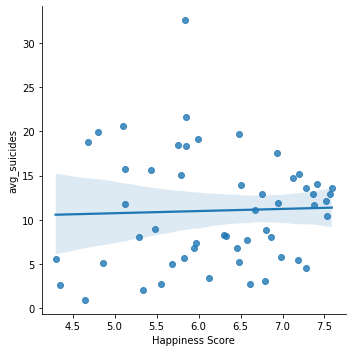

In [53]:
# Happiness Score vs Average Suicides Scatter Plot
sns.lmplot(x="Happiness Score", y="avg_suicides", data=happy_suicide_2015_final)

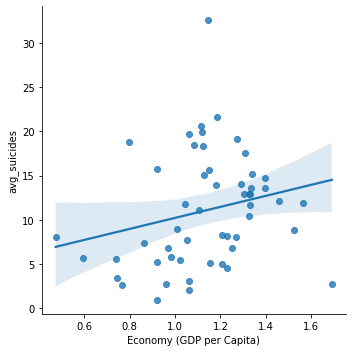

In [42]:
# Econ vs Average Suicides Scatter Plot
sns.lmplot(x="Economy (GDP per Capita)", y="avg_suicides", data=happy_suicide_2015_final)

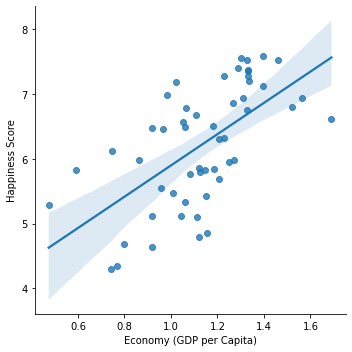

In [47]:
sns.lmplot(x="Economy (GDP per Capita)", y="Happiness Score", data=happy_suicide_2015_final)